<a href="https://colab.research.google.com/github/feniltailor22/Machine_Learning/blob/main/MNIST_Data_Set_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Visualizing the Image Data

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Visualizing first image
single_image= x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

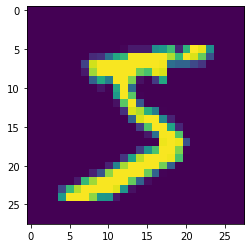

In [ ]:
plt.imshow(single_image)

In [ ]:
#Pre-processing the Data 

In [ ]:
#Applying one-hot encoding to y_train data as Machine cannot understand 9 categories.
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train= to_categorical(y=y_train, num_classes=10)

In [ ]:
y_cat_test= to_categorical(y=y_test, num_classes=10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_cat_train.shape

(60000, 10)

In [ ]:
#Checking one-hot encoding to the first image.
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Normalizing the Input Data as we have values from 0-255 and higher pixel value can dominate the lower pixel values.

In [ ]:
#normalizing in a custom way.

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

In [ ]:
x_train= x_train/255 #Dividing each pixel value of training data with maximum pixel value

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_test= x_test/255 #Doing the same for Testing Data

In [ ]:
#Checking whether if any data has been lost for first single image after Normalization.
scaled_single= x_train[0] 

In [ ]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

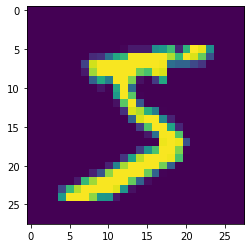

In [ ]:
plt.imshow(scaled_single)

In [ ]:
#No data has been lost after applying Normalization.

In [ ]:
#Pre-processing the Data

In [ ]:
#Reshape the Data to include Color channel dimensions

In [ ]:
x_train= x_train.reshape(60000, 28, 28, 1)
#Here 1 represents the number of channels.
#If Gray Level Image: take 1.
#If Gray Level Image: take 3(RGB).

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test= x_test.reshape(10000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#Creating CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape= (28,28,1), activation='relu'))  #Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2))) #Pooling Layer
 
#Flattening the 28*28 Matrix Images(2D) into 784 Vector Matrix Images(1D).
#Flattening is done before final layer
model.add(Flatten())

#Last layer of CNN is always Dense layer.
model.add(Dense(units=128, activation='relu'))

#Output layer
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop= EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x=x_train,
          y=y_cat_train,
          epochs=10,
          validation_data=(x_test,y_cat_test),
          verbose=True,
          callbacks=[early_stop]
          )

Epoch 1/10
1875/1875 [==============================] - 36s 3ms/step - loss: 0.1429 - accuracy: 0.9571 - val_loss: 0.0566 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.0407 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0430 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0498 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0438 - val_accuracy: 0.9871


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses= pd.DataFrame(data=model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.142860,0.957150,0.056646,0.9818
1,0.050415,0.983967,0.040714,0.9869
2,0.030784,0.990283,0.042968,0.9856
3,0.022356,0.992667,0.049751,0.9836
4,0.015558,0.995067,0.043813,0.9871


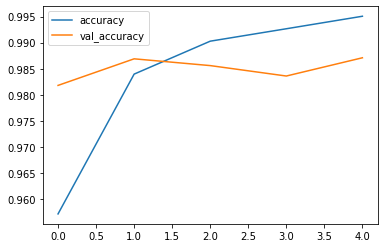

In [ ]:
losses[['accuracy','val_accuracy']].plot()

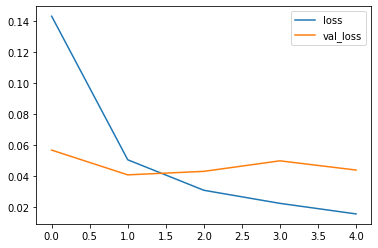

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
prediction= model.predict(x_test)

In [ ]:
#Predicting the first testing image output
prediction[0]

array([4.7061373e-09, 4.0086293e-10, 2.1019316e-08, 9.9897370e-06,
       5.1642479e-12, 3.6033100e-11, 2.3090337e-17, 9.9998856e-01,
       3.8799709e-07, 1.0625803e-06], dtype=float32)

In [ ]:
#Converting above probabilistic array prediction into number form
prediction_classes= np.argmax(prediction, axis=1)

In [ ]:
#predicted output
prediction_classes[125]

9

In [ ]:
#actual output
y_test[125]

9

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,prediction_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test,prediction_classes))

[[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1130    2    2    0    0    0    0    1    0]
 [   2    1 1018    5    1    0    0    1    4    0]
 [   0    0    1 1005    0    2    0    0    2    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   2    0    0   12    0  867    5    0    5    1]
 [   8    4    0    1    1    0  941    0    3    0]
 [   0    1   14    0    1    1    0 1006    1    4]
 [   3    0    1    2    0    0    0    1  963    4]
 [   1    1    0    6    7    4    0    0    3  987]]


In [ ]:
my_number= x_test[97]

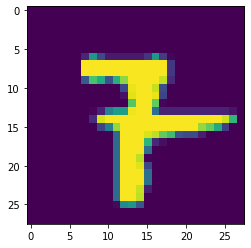

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
single_prediction= model.predict(my_number.reshape(1,28,28,1))
#(.reshape(no._of_images,widthy,hight,color))

In [ ]:
prediction_classes= np.argmax(single_prediction, axis=1)

In [ ]:
prediction_classes

array([7])